In [1]:
import pandas as pd
import random
from constants import LOGIC_OPERANDS
from InferenceEngine import InferenceEngine
from KnowledgeBase import *
from Algorithms.TruthTable import *
from Algorithms.FowardChaining import *
from Algorithms.BackwardChaining import *
from Algorithms.WalkSAT import *
from Algorithms.DPLL import *
PROBABILITY_OF_HORN_QUERY_BEING_AN_EXPRESSION = 0.7
PROBABILITY_OF_QUERY_BEING_AN_EXPRESSION = 0.6


ModuleNotFoundError: No module named 'pandas'

In [ ]:
pip install pandas

In [ ]:
def generate_horn_clause(num_symbols, number_of_horn_clauses=10):
    symbols = set(random.sample([chr(i) for i in range(ord("a"), ord("z") + 1)], num_symbols))
    horn_clauses, single_literals = set(), set()
    while len(horn_clauses) + len(single_literals) < number_of_horn_clauses:
        consequent = random.choice(list(symbols))
        if random.random() <= PROBABILITY_OF_HORN_QUERY_BEING_AN_EXPRESSION:
            antecedents = random.sample(symbols - {consequent}, random.randint(1, num_symbols - 1))
            horn_clauses.add(f"{' & '.join(antecedents)} => {consequent}")
        else:
            single_literals.add(consequent)
    tell = "; ".join(horn_clauses) + (";" if horn_clauses else "") + (" " + "; ".join(single_literals) + ";" if single_literals else "")
    return f"TELL\n{tell}\nASK\n{random.choice(list(symbols))}\n"


In [ ]:
# list1 = []
# for i in range(1000):
#     print(i)
#     param1 = random.randint(3, 5)
#     param2 = random.randint(6, 15)
#     print(param1, param2)
#     clause = generate_horn_clause(param1, param2)
#     list1.append(clause)

0
5 8


NameError: name 'generate_horn_clause' is not defined

In [ ]:

# df = pd.DataFrame(list1)
# df.to_csv('./horn_clauses.csv', sep = '|' ,index=False)

In [ ]:
df1 = pd.read_csv('./horn_clauses.csv', sep= '|')
df1

,text
0,TELL\nn & o => l; x & u & n & o => l; l => o; ...
1,TELL\nt => i; p & a & i & t => v; p & t & a =>...
2,TELL\nj & n => m; j & m => n; n => j; n & m =>...
3,TELL\ng & y => p; r & p & g => o; g & y & o & ...
4,TELL\nf & o & i & v => a; v => a; a & i => o; ...
...,...
995,TELL\nh & a & b => m; a & m & h => p; h & p =>...
996,TELL\na & g => o; g & a => o; g => a; a => g; ...
997,TELL\nz & a => v; v => p; v => a; a => p; v & ...
998,TELL\ns & p => l; u & w & p & l => s; u => p; ...


In [ ]:
import time

def TTread_function(text):
    knowledge_base = KnowledgeBase(False)
    knowledge_base.read_text(text)
    algorithm = TruthTableAlgorithm(knowledge_base)
    start_time = time.time()
    entails_result = algorithm.entails()
    end_time = time.time()
    time_taken = end_time - start_time
    return time_taken * 1000

def FCread_function(text):
    knowledge_base = KnowledgeBase(True)
    knowledge_base.read_text(text)
    algorithm = ForwardChainingAlgorithm(knowledge_base)
    start_time = time.time()
    entails_result = algorithm.entails()
    end_time = time.time()
    time_taken = end_time - start_time
    return time_taken * 1000

def BCread_function(text):
    knowledge_base = KnowledgeBase(True)
    knowledge_base.read_text(text)
    algorithm = BackwardChainingAlgorithm(knowledge_base)
    start_time = time.time()
    entails_result = algorithm.entails()
    end_time = time.time()
    time_taken = end_time - start_time
    return time_taken * 1000

def WALKSATread_function(text):
    knowledge_base = KnowledgeBase(True)
    knowledge_base.read_text(text)
    algorithm = WalkSAT(knowledge_base)
    start_time = time.time()
    entails_result = algorithm.entails()
    end_time = time.time()
    time_taken = end_time - start_time
    return time_taken

def DPLLread_function(text):
    knowledge_base = KnowledgeBase(True)
    knowledge_base.read_text(text)
    algorithm = DPLL(knowledge_base)
    start_time = time.time()
    entails_result = algorithm.entails()
    end_time = time.time()
    time_taken = end_time - start_time
    return time_taken


In [ ]:
df1['TT'] = df1['text'].apply(TTread_function)
df1['FC'] = df1['text'].apply(FCread_function)
df1['BC'] = df1['text'].apply(BCread_function)
df1['DPLL'] = df1['text'].apply(DPLLread_function)


In [ ]:
columns = ["TT", "FC", "BC", "DPLL"]
# Calculate mean, median, and total for each column
result1 = pd.DataFrame(columns=["Mean", "Median"], index=["TT", "FC", "BC", "DPLL"])

for column in columns:
    result1.at[column, "Mean"] = df1[column].mean()
    result1.at[column, "Median"] = df1[column].median()
    # result1.at[column, "Total"] = df1[column].sum()

print(result1)

          Mean    Median
TT    0.196825  0.136018
FC    0.002743  0.002146
BC    0.003304  0.002146
DPLL  0.000161  0.000154


In [ ]:
pip install seaborn

<Axes: xlabel='index', ylabel='Value'>

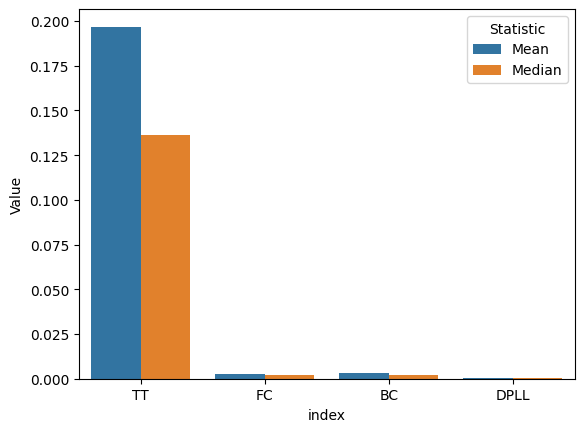

In [ ]:
import seaborn as sns
result1 = result1.reset_index()

# Melt the DataFrame for easier plotting
result_melted = result1.melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot using Seaborn
sns.barplot(x='index', y='Value', hue='Statistic', data=result_melted)
